In [19]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
import sklearn.datasets as ds
from sklearn.pipeline import Pipeline
import plotly
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score
, f1_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# from impyute.imputation.cs import fast_knn

pd.options.display.max_columns
pd.options.display.max_rows


60

In [3]:
df = pd.read_csv('VAW.csv')
df.head()


,DATAFLOW,FREQ: Frequency,TIME_PERIOD: Time,GEO_PICT: Pacific Island Countries and territories,TOPIC: Topic,INDICATOR: Indicator,SEX: Sex,AGE: Age,CONDITION: Women’s condition,VIOLENCE_TYPE: Type of violence,...,OUTCOME: Outcome,RESPONSE: Response,HELP_REASON: Reason for searching help,HELP_PROVIDER: Help provider,OBS_VALUE,UNIT_MEASURE: Unit of measure,UNIT_MULT: Unit multiplier,OBS_STATUS: Observation Status,DATA_SOURCE: Data source,OBS_COMMENT: Comment
0,SPC:DF_VAW(1.0),A: Annual,2013,CK: Cook Islands,VAW_TOPIC_001: Types of violence against women...,NUMPERRF: Number of persons in relative frequency,F: Female,Y15T64: 15-64,EVPART: Ever-partnered,CONT_ECON: At least one act of economic abusive,...,_T: Any,_T: Any,_T: Any,_T: Any,6.2,PERCENT: percent,NaN,NaN,FHSS,NaN
1,SPC:DF_VAW(1.0),A: Annual,2013,CK: Cook Islands,VAW_TOPIC_001: Types of violence against women...,NUMPERRF: Number of persons in relative frequency,F: Female,Y15T64: 15-64,EVPART: Ever-partnered,EMO: Emotional violence,...,_T: Any,_T: Any,_T: Any,_T: Any,9.6,PERCENT: percent,NaN,NaN,FHSS,NaN
2,SPC:DF_VAW(1.0),A: Annual,2013,CK: Cook Islands,VAW_TOPIC_001: Types of violence against women...,NUMPERRF: Number of persons in relative frequency,F: Female,Y15T64: 15-64,EVPART: Ever-partnered,EMO: Emotional violence,...,_T: Any,_T: Any,_T: Any,_T: Any,26.7,PERCENT: percent,NaN,NaN,FHSS,NaN
3,SPC:DF_VAW(1.0),A: Annual,2013,CK: Cook Islands,VAW_TOPIC_001: Types of violence against women...,NUMPERRF: Number of persons in relative frequency,F: Female,Y15T64: 15-64,EVPART: Ever-partnered,PHYS: Physical violence,...,_T: Any,_T: Any,_T: Any,_T: Any,6.7,PERCENT: percent,NaN,NaN,FHSS,NaN
4,SPC:DF_VAW(1.0),A: Annual,2013,CK: Cook Islands,VAW_TOPIC_001: Types of violence against women...,NUMPERRF: Number of persons in relative frequency,F: Female,Y15T64: 15-64,EVPART: Ever-partnered,PHYS: Physical violence,...,_T: Any,_T: Any,_T: Any,_T: Any,30.2,PERCENT: percent,NaN,NaN,FHSS,NaN


In [4]:
df_numerical = df.copy(deep=True)
df_numerical.drop(['FREQ: Frequency','DATAFLOW', 'OBS_VALUE',
'OBS_COMMENT: Comment','OBS_STATUS: Observation Status',
'SEX: Sex', 'UNIT_MULT: Unit multiplier', 'AGE: Age', 'INDICATOR: Indicator'
, 'UNIT_MEASURE: Unit of measure',
'HELP_PROVIDER: Help provider', 'HELP_REASON: Reason for searching help'
, 'RESPONSE: Response', 'LIFEPER: Period of life'], axis=1,inplace=True)
def handle_non_numerical_data(df):
 columns = df.columns.values
 for column in columns:
  text_digit_vals = {}
  def convert_to_int(val):
   return text_digit_vals[val]

  if df[column].dtype != np.int64 and df[column].dtype != np.float64:
   column_contents = df[column].values.tolist()
   unique_elements = set(column_contents)
   x = 1
   for unique in unique_elements:
    if unique == '_T: Any':
     text_digit_vals[unique] = 0
    elif unique not in text_digit_vals:
     text_digit_vals[unique] = x
     x += 1
   df[column] = list(map(convert_to_int, df[column]))
 return df

df_numerical = handle_non_numerical_data(df_numerical)

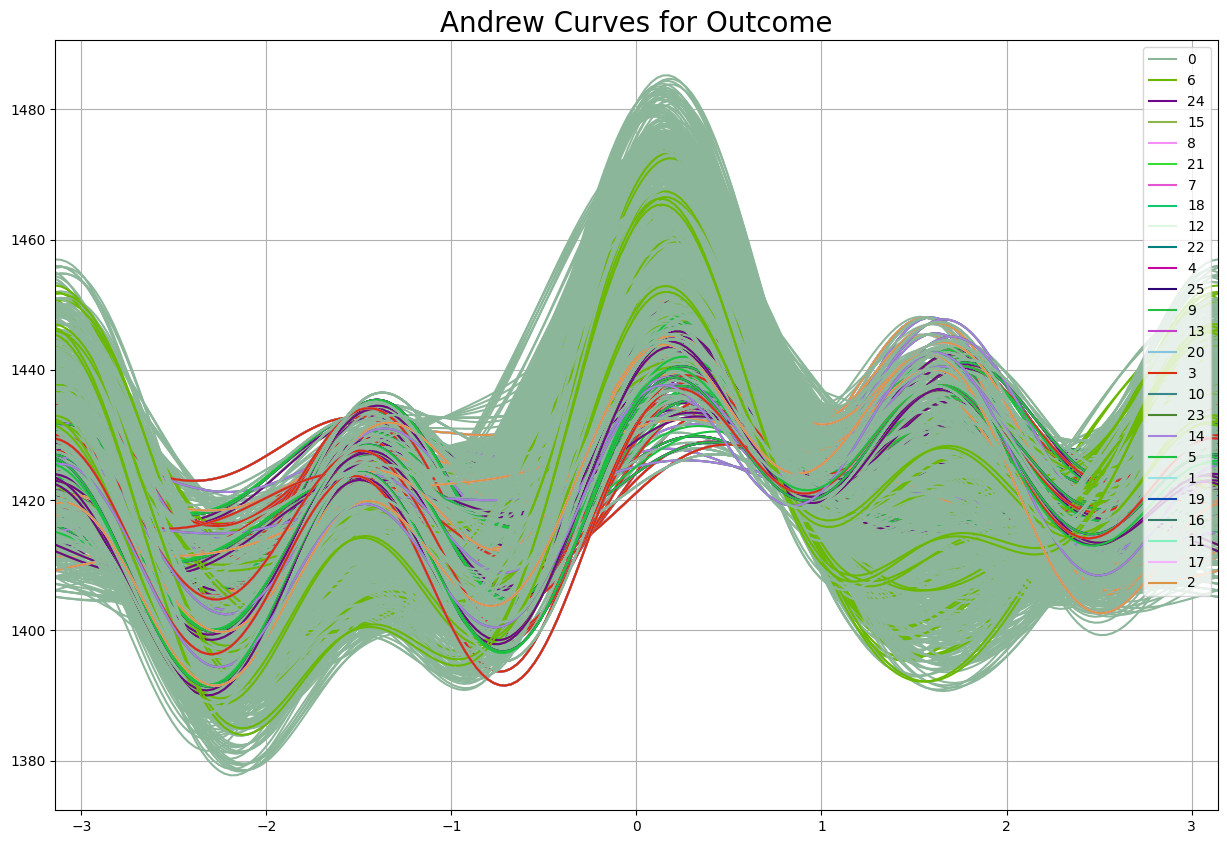

In [5]:
 from pandas import plotting
plt.rcParams['figure.figsize'] = (15, 10)
plotting.andrews_curves(df_numerical,'OUTCOME: Outcome')
plt.title('Andrew Curves for Outcome', fontsize = 20)
plt.show()

In [30]:
%pip install matplotlib

CONDITION: Women’s condition

Class=EVPART: Ever-partnered, Count=688, Percentage=34.127%
Class=EVPREG: Ever pregnant, Count=112, Percentage=5.556%
Class=_T: Any, Count=1056, Percentage=52.381%
Class=W4M: Working for money, Count=64, Percentage=3.175%
Class=CHI614: With children 6-14 years old, Count=96, Percentage=4.762%

CONDITION: Women’s condition - NUMERICAL

Class=4, Count=688, Percentage=34.127%
Class=3, Count=112, Percentage=5.556%
Class=0, Count=1056, Percentage=52.381%
Class=1, Count=64, Percentage=3.175%
Class=2, Count=96, Percentage=4.762%


VIOLENCE_TYPE: Type of violence

Class=CONT_ECON: At least one act of economic abusive, Count=16, Percentage=0.794%
Class=EMO: Emotional violence, Count=32, Percentage=1.587%
Class=PHYS: Physical violence, Count=256, Percentage=12.698%
Class=PHYSORSEX: Physical and/or sexual violence, Count=144, Percentage=7.143%
Class=SEX: Sexual violence, Count=240, Percentage=11.905%
Class=_T: Any, Count=704, Percentage=34.921%
Class=PHYS_MOD: Modera

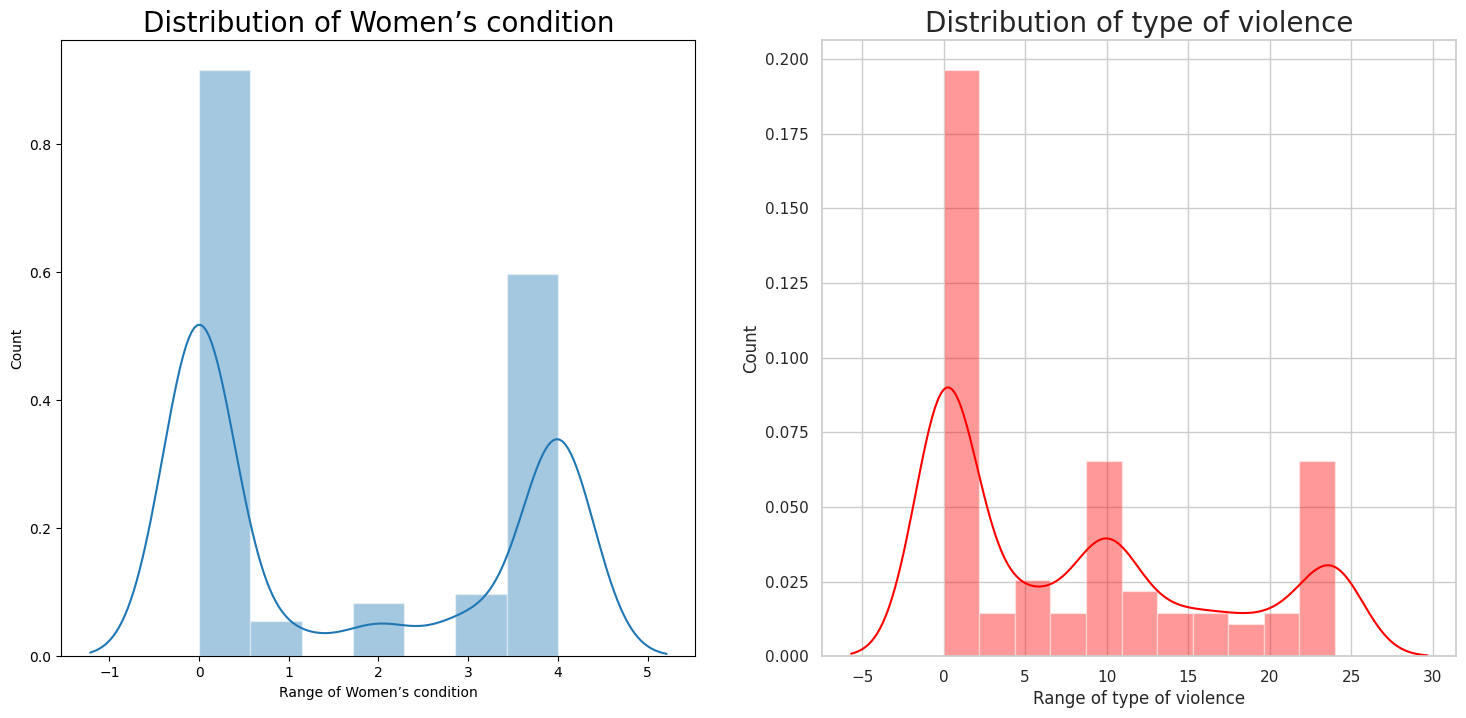

In [20]:
import warnings
warnings.filterwarnings('ignore')

print('CONDITION: Women’s condition\n')
Z = df['CONDITION: Women’s condition']
counter = Counter(Z)

for k,v in counter.items():
 per = v / len(Z) * 100
 print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))
    
print('\nCONDITION: Women’s condition - NUMERICAL\n')
Z_numerical = df_numerical['CONDITION: Women’s condition']
counter = Counter(Z_numerical)

for k,v in counter.items():
 per = v / len(Z_numerical) * 100
 print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))
    
print('\n\nVIOLENCE_TYPE: Type of violence\n')
Z = df['VIOLENCE_TYPE: Type of violence']
counter = Counter(Z)

for k,v in counter.items():
 per = v / len(Z) * 100
 print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))
    
print('\nVIOLENCE_TYPE: Type of violence - NUMERICAL\n')
Z_numerical = df_numerical['VIOLENCE_TYPE: Type of violence']
counter = Counter(Z_numerical)

for k,v in counter.items():
 per = v / len(Z_numerical) * 100
 print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))
    
plt.rcParams['figure.figsize'] = (18, 8)
plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(df_numerical['CONDITION: Women’s condition'])
plt.title('Distribution of Women’s condition', fontsize = 20)
plt.xlabel('Range of Women’s condition')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(df_numerical['VIOLENCE_TYPE: Type of violence'], color = 'red')
plt.title('Distribution of type of violence', fontsize = 20)
plt.xlabel('Range of type of violence')
plt.ylabel('Count')
plt.show()

TOPIC: Topic

Class=VAW_TOPIC_001: Types of violence against women by partner, Count=160, Percentage=7.937%
Class=VAW_TOPIC_002: Partner Physical violence by severity, Count=32, Percentage=1.587%
Class=VAW_TOPIC_003: Act of physical violence by partners, Count=192, Percentage=9.524%
Class=VAW_TOPIC_004: Acts of sexual violence by partners, Count=96, Percentage=4.762%
Class=VAW_TOPIC_005: Acts of emotional  violence by partners, Count=96, Percentage=4.762%
Class=VAW_TOPIC_006: Acts of controlling behaviours by partners, Count=128, Percentage=6.349%
Class=VAW_TOPIC_007: Types of violence against women by others (non-partners), Count=144, Percentage=7.143%
Class=VAW_TOPIC_008: Non-Partner Physical violence by type of perpetrator, Count=128, Percentage=6.349%
Class=VAW_TOPIC_009: Non-Partner Sexual violence by type of perpetrator, Count=128, Percentage=6.349%
Class=VAW_TOPIC_010: Child sexual abuse prevalence by type of perpetrator, Count=80, Percentage=3.968%
Class=VAW_TOPIC_011: Injuries

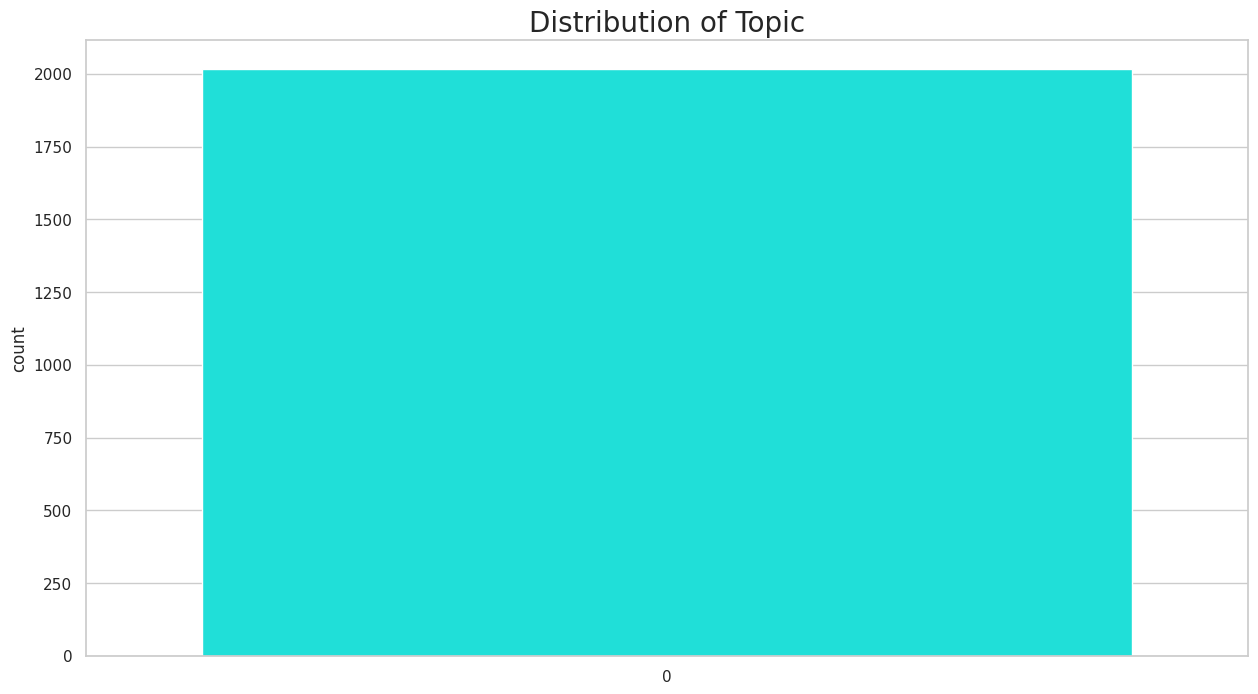

In [24]:
print('TOPIC: Topic\n')
Z = df['TOPIC: Topic']
counter = Counter(Z)
for k,v in counter.items():
  per = v / len(Z) * 100
  print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))\
    
print('\nTOPIC: Topic - NUMERICAL\n')
Z_numerical = df_numerical['TOPIC: Topic']
counter = Counter(Z_numerical)
for k,v in counter.items():
  per = v / len(Z_numerical) * 100
  print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))
    
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(df_numerical['TOPIC: Topic'], palette = 'hsv')
plt.title('Distribution of Topic', fontsize = 20)
plt.show()


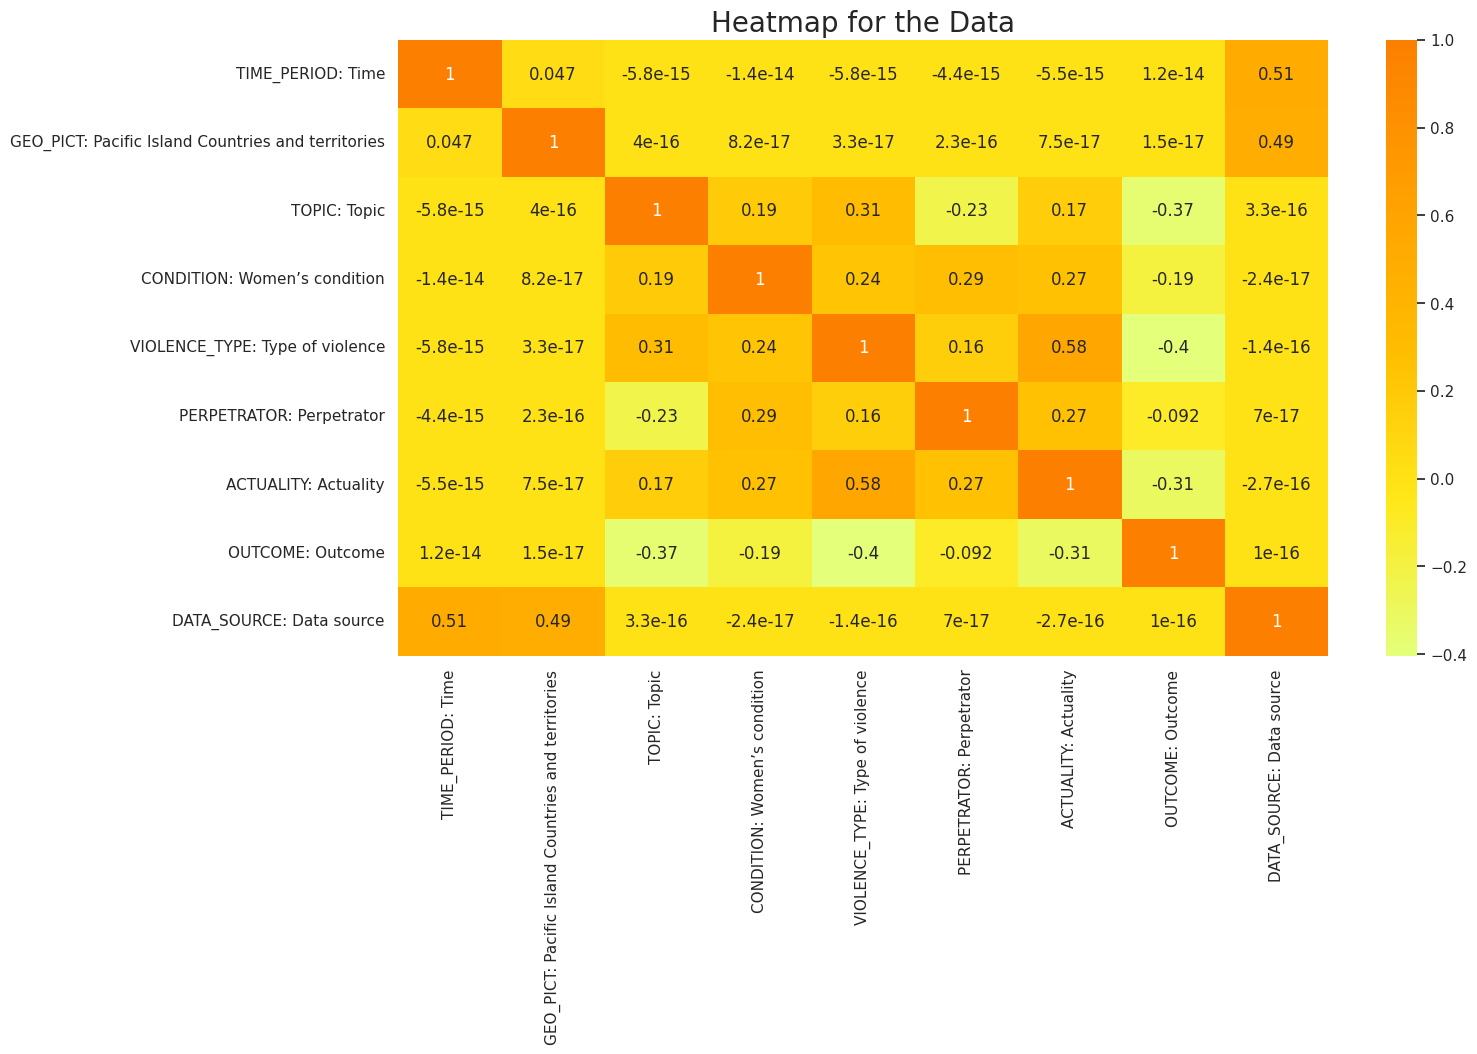

In [25]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(df_numerical.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()


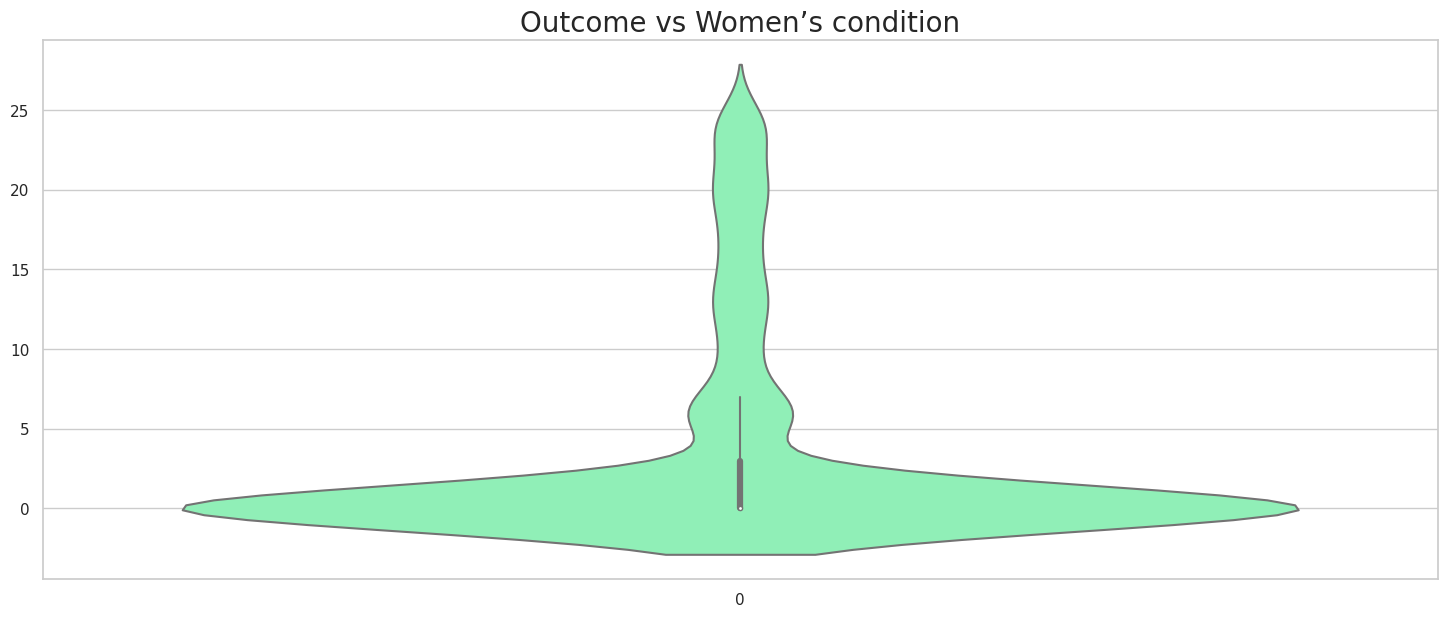

In [27]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(df_numerical['OUTCOME: Outcome'],palette = 'rainbow')
plt.title('Outcome vs Women’s condition', fontsize = 20)
plt.show()

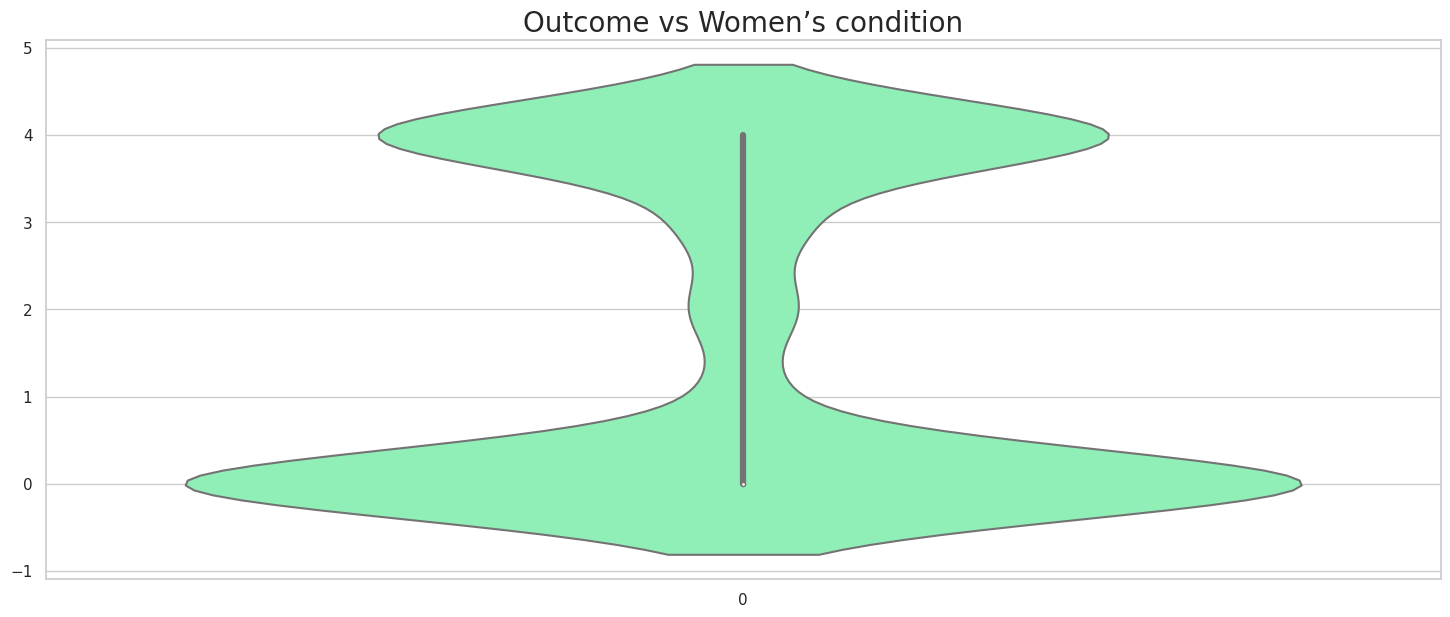

In [28]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(df_numerical['CONDITION: Women’s condition'],palette = 'rainbow')
plt.title('Outcome vs Women’s condition', fontsize = 20)
plt.show()

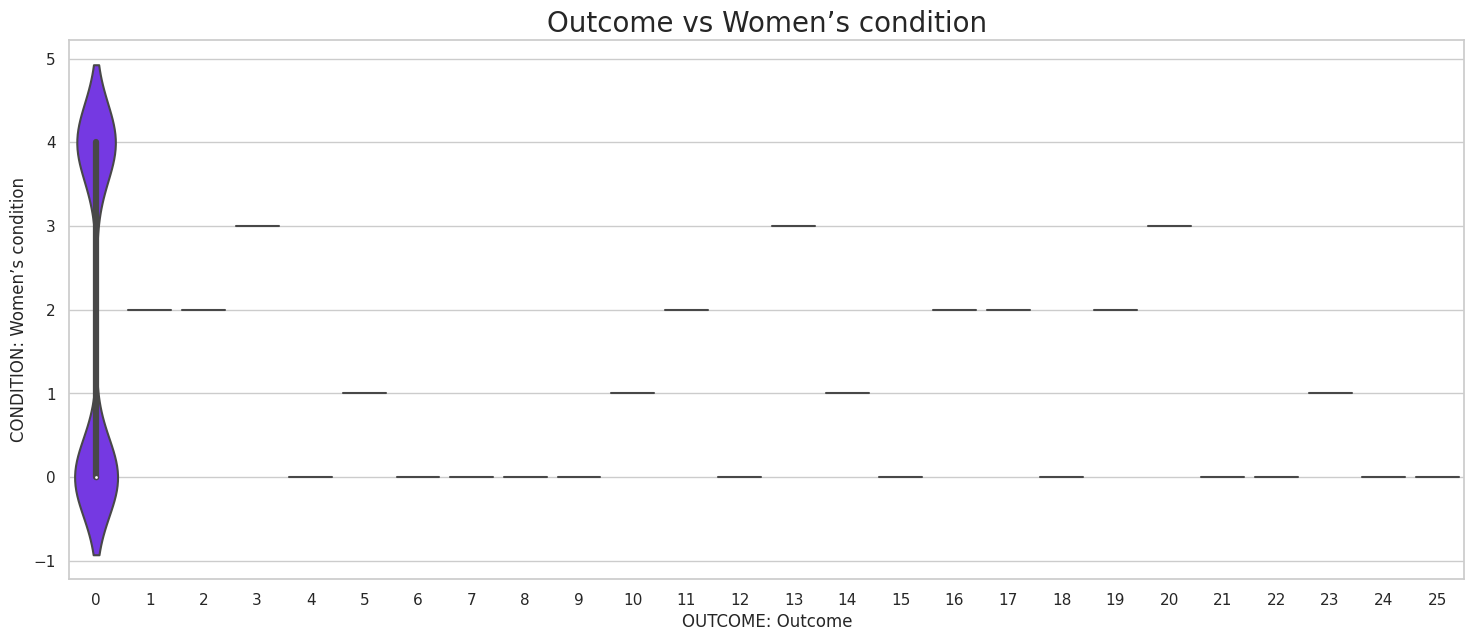

In [33]:
 plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(x=df_numerical['OUTCOME: Outcome'], y=df_numerical['CONDITION: Women’s condition'], palette = 'rainbow')
plt.title('Outcome vs Women’s condition', fontsize = 20)
plt.show()

In [34]:
 # COUNT MISSING OR NULL VALUES
df = df.replace('_T: Any', np.NaN)
Y_null = df['OUTCOME: Outcome']
X_null = df.loc[:, df.columns != 'OUTCOME: Outcome']
x_null = X_null.isnull().sum()
y_null = Y_null.isnull().sum()
print('\nMissing values in X:\n', x_null)
print('\nNumber of rows with OUTCOME ANY:\n', y_null)


Missing values in X:
 DATAFLOW                                                 0
FREQ: Frequency                                          0
TIME_PERIOD: Time                                        0
GEO_PICT: Pacific Island Countries and territories       0
TOPIC: Topic                                             0
INDICATOR: Indicator                                     0
SEX: Sex                                                 0
AGE: Age                                                 0
CONDITION: Women’s condition                          1056
VIOLENCE_TYPE: Type of violence                        704
PERPETRATOR: Perpetrator                               256
ACTUALITY: Actuality                                   832
LIFEPER: Period of life                               1536
RESPONSE: Response                                    1904
HELP_REASON: Reason for searching help                1920
HELP_PROVIDER: Help provider                          1936
OBS_VALUE                        

In [35]:
 df_not_any = df[df['OUTCOME: Outcome'].notnull()]
X = df_not_any.loc[:, df.columns != 'OUTCOME: Outcome']
Y = df_not_any['OUTCOME: Outcome']
print("\nDATASET SHAPE WITH OUTCOME!=ANY: \n", df_not_any.shape)
df_with_any = df[df['OUTCOME: Outcome'].isnull()]
X_with_any = df_with_any.loc[:, df.columns != 'OUTCOME: Outcome'].reset_index()
print("DATASET SHAPE WITH OUTCOME=ANY: \n", df_with_any.shape)



DATASET SHAPE WITH OUTCOME!=ANY: 
 (544, 23)
DATASET SHAPE WITH OUTCOME=ANY: 
 (1472, 23)
